# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
import tensorflow as tf
import keras
import numpy as np
import random
import pandas as pd

Using TensorFlow backend.


In [3]:
np.random.seed(1707)

In [4]:
tf.__version__
keras.__version__

'2.2.4'

In [5]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
signs = pd.read_csv("signnames.csv")

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train["features"])
# TODO: Number of validation examples
n_validation = len(valid["features"])


# TODO: Number of testing examples.
n_test = len(test["features"])

# TODO: What's the shape of an traffic sign image?
image_shape = train["features"].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(len(np.unique(train["labels"])), len(np.unique(valid["labels"])) ,len(np.unique(test["labels"])))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [6]:
# sanity check
assert len(train["features"]) == len(train["labels"])
assert len(valid["features"]) == len(valid["labels"])
assert len(test["features"]) == len(test["labels"])

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train, X_valid, X_test = train["features"], valid["features"], test["features"]
y_train, y_valid, y_test = train["labels"], valid["labels"], test["labels"]

33


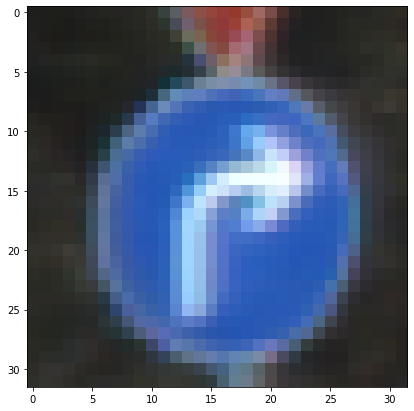

In [82]:
index = random.randint(0, len(X_train))
image = X_train[index]

plt.figure(figsize=(7,7))
plt.imshow(image)
print(y_train[index])

In [10]:
EPOCHS = 30
BATCH_SIZE = 128
LEARN_RATE = 0.001

In [11]:
def quick_normalize(X):
    return X/255.0

def normalize(image_data, min_range=0.1, max_range=0.9):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    img_max, img_min = image_data.max(), image_data.min()
    image_scaled = min_range+(image_data-img_min)*(max_range-min_range)/(img_max-img_min)
    return image_scaled

In [12]:
X_train, X_valid, X_test = quick_normalize(X_train), quick_normalize(X_valid), quick_normalize(X_test)
# X_train, X_valid, X_test = normalize(X_train, min_range=0.0, max_range=1.0), normalize(X_valid, min_range=0.0, max_range=1.0), normalize(X_test, min_range=0.0, max_range=1.0)

### Transfer Learning

#### Fastai

In [13]:
from fastai.vision import *
from fastai.metrics import accuracy

In [14]:
bs = 128

In [15]:
#X_train = X_train.reshape(n_train, 3, 32, 32)  # this is fucking wrong! it reshapes it incorrectly
#X_val = X_valid.reshape(n_validation, 3, 32, 32)

X_train = np.moveaxis(X_train, -1, 1)

In [16]:
X_val = np.moveaxis(X_valid, -1, 1)

In [17]:
# X = np.concatenate((X_train, X_val), axis=0)
# y = np.concatenate((y_train, y_valid), axis=0)
class_num = np.max(y_train) + 1
class_num

43

In [18]:
tfms = get_transforms(do_flip=False, max_rotate=20, max_zoom=1.1, max_lighting=0.8)
# tfms = [RandomRotate(20), RandomLighting(0.8, 0.8)]

In [21]:
class ArrayImageList(ImageList):
    @classmethod
    def from_numpy(cls, numpy_array):
        return cls(items=numpy_array)
    
    def label_from_array(self, array, label_cls=None, **kwargs):
        return self._label_from_list(array,label_cls=label_cls,**kwargs)
    
    def get(self, i):
        n = self.items[i]
        n = torch.tensor(n).float()
        return Image(n)

data = (ArrayImageList.from_numpy(X_train)
        .split_none()
        .label_from_array(y_train, classes=list(range(class_num)))
        .transform(tfms, size=96)
        .databunch(bs=bs)).normalize()


In [22]:
val_data = (ArrayImageList.from_numpy(X_val)
            .split_none()
            .label_from_array(y_valid, classes=list(range(class_num)))
            .transform(tfms, size=96)
            .databunch(bs=bs)).normalize()

In [23]:
data.valid_dl = val_data.train_dl

4286


25    Road work
Name: SignName, dtype: object

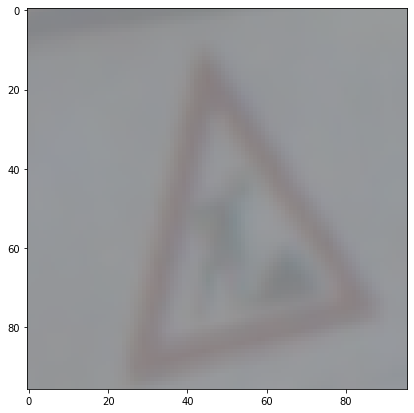

In [24]:
index = random.randint(0, len(data.valid_ds))
print(index)
x,y = data.valid_ds[index]
sample = x.data.numpy()
sample = np.moveaxis(sample, 0, -1)
plt.figure(figsize=(7,7))
plt.imshow(sample)
signs.loc[signs["ClassId"]==y.data, "SignName"]


29146


12    Priority road
Name: SignName, dtype: object

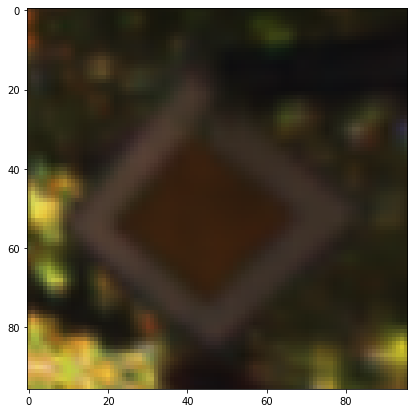

In [25]:
index = random.randint(0, len(data.train_ds))
print(index)
x,y = data.train_ds[index]
sample = x.data.numpy()
sample = np.moveaxis(sample, 0, -1)
plt.figure(figsize=(7,7))
plt.imshow(sample)
signs.loc[signs["ClassId"]==y.data, "SignName"]


In [31]:
learn = cnn_learner(data,models.resnet18, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


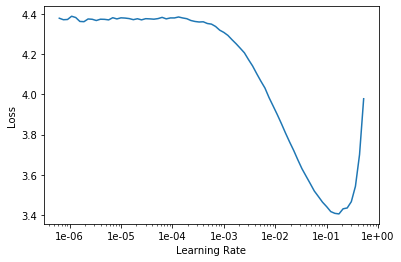

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(15, slice(2e-3, 1e-1), wd=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.144923,1.087313,0.652803,00:19
1,0.823377,0.890965,0.762408,00:20
2,1.127541,1.558139,0.695083,00:13
3,1.299021,1.209907,0.740119,00:10
4,1.357227,1.797868,0.707950,00:10
5,1.374406,8.457999,0.373392,00:10
6,1.171736,1.564064,0.742188,00:10
7,0.898271,0.945373,0.784237,00:10
8,0.722575,0.902479,0.810432,00:10
9,0.537963,0.591054,0.865579,00:10


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


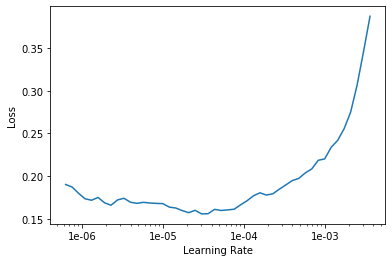

In [34]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [35]:
# Train all layers again for a few epochs
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.175885,0.249565,0.930836,00:12
1,0.162480,0.262762,0.927160,00:12
2,0.167269,0.222022,0.939568,00:12
3,0.154258,0.218826,0.937270,00:12
4,0.158301,0.227318,0.941866,00:12
5,0.145562,0.250320,0.932215,00:12
6,0.141205,0.219508,0.940947,00:12
7,0.145738,0.201079,0.944164,00:12


In [208]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Summary: Pulling every trick in the book (upsizing, image augmentation, transfer learning with resnet34, weight decay to combat overfitting, cyclic learning schedule, unfreeze and finetune last layer) and I can't get beyond 91% accuracy ...

However with the correct augmentations I can get up to almost 96%

#### Keras

In [240]:
from keras.layers import BatchNormalization, Dropout, Flatten,Dense,Conv2D,MaxPooling2D,Activation
from keras.applications.resnet50 import ResNet50
from keras.models import Model, Sequential

In [241]:
number_classes = n_classes
model = ResNet50(include_top=False, weights=None, input_tensor=None, pooling='max', input_shape=image_shape, classes=n_classes)
model.load_weights('/home/q454024/Applied_Deep_Learning_Training/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5') # cant include weights anymore? - should be possible

In [242]:
x = model.layers[-3].output
x = Flatten()(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
pred = Dense(n_classes,activation='softmax')(x)
model = Model(input=model.input, output=pred)

/opt/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [252]:
from keras.preprocessing.image import ImageDataGenerator
print('initializing train data gen')
train_datagen = ImageDataGenerator(
    rotation_range=15.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    vertical_flip=False, 
    horizontal_flip=False 
    )
train_datagen.fit(X_train)

#initialize validation data generator (doesnt augment data)
validation_datagen = ImageDataGenerator()
validation_datagen.fit(X_valid)

initializing train data gen


In [268]:
batch_size = 128
epochs = 10
seed = 1707

steps_per_epoch = n_train // batch_size
validation_steps = n_validation // batch_size

optimizer = 'adagrad'
loss = 'categorical_crossentropy'
number_classes = n_classes
input_shape= (224,224,3) 

In [269]:
y_valid.shape

(4410,)

In [270]:
model.compile(loss=loss, optimizer=optimizer,metrics=['acc'])
hist=model.fit_generator(
        train_datagen.flow(X_train, y_train),
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_datagen.flow(X_valid, y_valid),
        validation_steps=validation_steps)

Epoch 1/10


ValueError: Error when checking target: expected dense_6 to have shape (43,) but got array with shape (1,)

Summary: Can't even get this shit to work!!